# Data Analysis To Find The Best Markets To Advertise An E-Learning Product

The project is to perform data analysis for an e-learning comapny that offers courses on programming. They offer courses on web and mobile development, data science, game development, etc. The company wants to promote the product and like to invest some money in advertising. 

The goal in this project is to find out the two best markets to advertise our product in.

For performing data analysis to achieve our goal, we can collect the data by organizing surveys in different markets to find out better market choices for madvertising. This is failry a costly option as conducting surveys can be expensive and also time consuming. 

Another way is to try and look for existing data which might be relevant for our purpose. This way, we can do our data analysis and answer a few questions with the data which is already available. 

For our project, we can use the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). The data can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey). The link to the survey can be found [here](https://medium.freecodecamp.org/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb).

The data set has over 130 columns which provides information about over 18K respondents, such as -
- demographics
- employment status
- job interests
- income
- resources used to learn coding 
The data set has an extensive list of columsns which descibes a lot more than the above mentioned characteristics. 


In [97]:
# Reading the data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

print(survey.shape)
survey.head()

(18175, 136)


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the Representativeness of the Sample for our Population of Interest 

In [98]:
# Analyzing JobRoleInterest column

survey['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                  

In [99]:
# Removing 'Nan' values
roles = survey['JobRoleInterest'].dropna()

# Splitting each values into list of seperate values
roles_split = roles.str.split(',')

roles_split.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [100]:
# Counting the number of values in each list of roles_split

roles_split_counts = roles_split.apply(lambda x: len(x))
roles_split_counts.value_counts(normalize = True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

In [101]:
# Finding rows which contain Web Developer or Mobile Developer as a job role interest
web_mob_dev = roles.str.contains('Mobile Developer|Web Developer')

In [102]:
# FInding out the frequency of the records having Web Developer or Mobile Developer as a job role interest
cnt_web_mob = web_mob_dev.value_counts(normalize = True)*100
cnt_web_mob

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

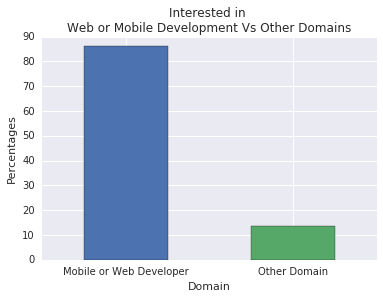

In [103]:

cnt_web_mob.plot.bar()
plt.title('Interested in \nWeb or Mobile Development Vs Other Domains')
plt.xticks([0,1],['Mobile or Web Developer','Other Domain'],rotation =0)
plt.xlabel('Domain')
plt.ylabel('Percentages')



- We see that most of the people are interetsed in more than one subject.
- The popularity of the courses on web and mobile development is evident. More than 85% of the respondents are interested in Mobile or Web Developer or both.

### Analyzing data to find the Two Best Countries to Advertise in

In [104]:
# Analyzing data based on the CounrtyLive column

country_data = survey[survey['JobRoleInterest'].notnull()].copy()
survey_country = country_data['CountryLive'].dropna()

# Finding number of respondents living in each country
country_cnts = survey_country.value_counts()
country_cnts.head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [105]:
# Evaluating relative frequencies
rel_country_freq = survey_country.value_counts(normalize = True)*100
rel_country_freq.head(10)

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

After looking at the counts of developers from each country, considering markets with considerable number of learners/developers makes sense for marketting a product. We will choose the countries where the number of learners/developers are more than 500.

Among the countries where the count of learners/developers are more than 500, from our analysis till now, USA and India clearly are the countries which can be chosen to market the product. 

We need to further analyze the data set on other factors before we make our final selections. 

### Analyzing how Much Money New Coders are  Willing to Spend on Learning

In [106]:
# Filtering data to contain infomration only for countries with more than 500 learners/coders.
money_learning = country_data[survey['CountryLive'].isin(['United States of America','India','Canada','United Kingdom'])]

# Replacing the MonthsProgramming value to 1.0 where the value is 0
money_learning['MonthsProgramming'].replace(0,1,inplace=True)

# Creating a new column to describe the amount of money student has spent per month 
# Rounding off the new column to 2 digits
money_learning['MoneyPerMonth'] = round(money_learning['MoneyForLearning']/money_learning['MonthsProgramming'],2)

money_learning.head()


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.33
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.00
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


United States of America    1619
India                        201
United Kingdom               137
Canada                       114
Name: CountryLive, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


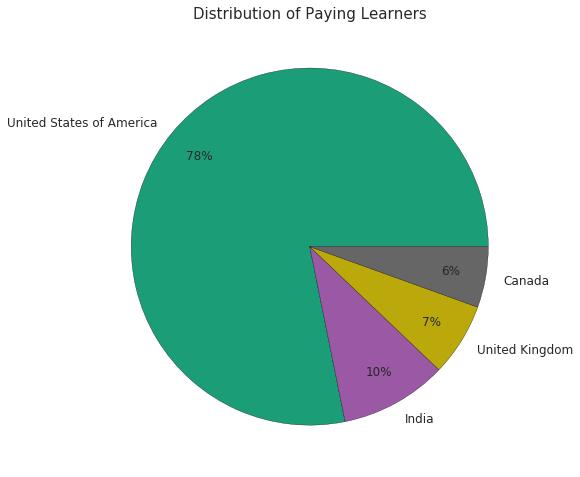

In [107]:

# Dropping all rows with Nan values
money_learning.dropna(subset=['MoneyPerMonth','CountryLive'], inplace = True)

# Finding out the number of paying learners/developers in each country
paying_count = money_learning[money_learning['MoneyPerMonth']>0]['CountryLive'].value_counts()

print(paying_count)

paying_count.plot.pie(figsize = (8,8),autopct='%1.0f%%',pctdistance=0.8,colormap = 'Dark2',fontsize = 12)
plt.ylabel('')
plt.title('Distribution of Paying Learners', fontsize = 15)

CountryLive
Canada                      113.510958
India                       135.101102
United Kingdom               45.534337
United States of America    227.998023
Name: MoneyPerMonth, dtype: float64


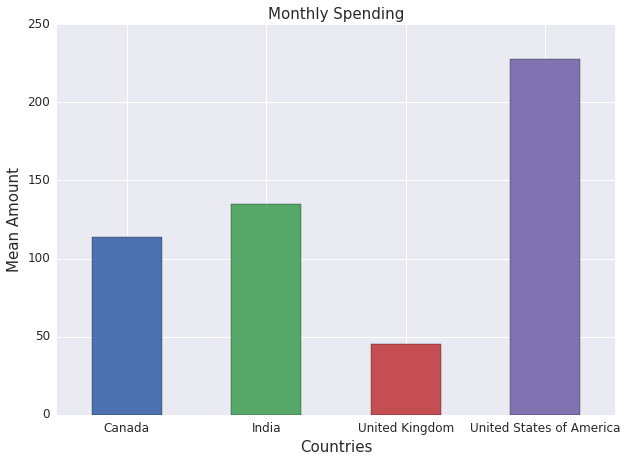

In [108]:
# Finding the mean amount spent monthly
mean_monthly = money_learning.groupby('CountryLive').mean()['MoneyPerMonth']
print(mean_monthly)

mean_monthly.plot.bar(figsize = (10,7),rot=0,fontsize=12)
plt.title('Monthly Spending', fontsize = 15)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('Mean Amount', fontsize = 15)


- The most number of paying learners are from United States of America followed by India. 
- The mean amount spent by learners in USA and India are on higher scale. 
- These mean amounts may be influenced by some outliers we need to do find the ouliers and recalculate the mean amounts to represent an appropriate value.


### Finding Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f9605e0c630>,
 <a list of 4 Text xticklabel objects>)

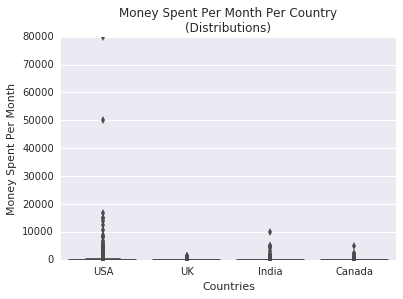

In [109]:
# Plotting barplot points to indentify outliers

sns.boxplot(x = 'CountryLive',y = 'MoneyPerMonth',data=money_learning)

plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.xlabel('Countries')
plt.ylabel('Money Spent Per Month')
plt.xticks(range(4),['USA','UK','India','Canada'])

There are clear outliers in the data we are analyzing. To find out meaningful statistics, we need to filter out records to contain more representative data.

We will consider data where the monthly spending is less than 20K.

In [110]:
# Filtering data to contain records where monthly spending is <20K
money_learning = money_learning[money_learning['MoneyPerMonth']<20000]

money_learning.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                      113.510958
India                       135.101102
United Kingdom               45.534337
United States of America    183.800136
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f9605cb5898>,
 <a list of 4 Text xticklabel objects>)

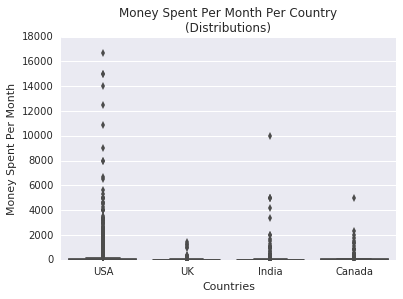

In [111]:
# Plotting barplot points to indentify outliers

sns.boxplot(x = 'CountryLive',y = 'MoneyPerMonth',data=money_learning)

plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.xlabel('Countries')
plt.ylabel('Money Spent Per Month')
plt.xticks(range(4),['USA','UK','India','Canada'])

The above distribution is much clear. There are still outliers we can see in the countries where the monthly amount spent is quite higher than usual. We will have to analyze the data for individual country to get more insights. Let us begin with analyzing the outliers for USA.
- We see that the extreme values for USA are above the amount $6000. 


In [112]:
# Filtering the outliers data to analyze the outliers.

outliers_usa = money_learning[(money_learning['MoneyPerMonth']>=6000) & (money_learning['CountryLive']== 'United States of America')]
outliers_usa[['AttendedBootcamp','MonthsProgramming','MoneyPerMonth','Income']]

,AttendedBootcamp,MonthsProgramming,MoneyPerMonth,Income
718,1.0,1.0,8000.00,44500.0
1222,1.0,2.0,6500.00,NaN
3184,1.0,1.0,9000.00,40000.0
3930,0.0,6.0,10833.33,NaN
6805,1.0,1.0,15000.00,NaN
7198,0.0,5.0,14000.00,NaN
7505,1.0,3.0,6666.67,NaN
9778,1.0,1.0,8000.00,20000.0
16650,0.0,12.0,16666.67,NaN
16997,0.0,1.0,12500.00,40000.0


- In the US, we see 11 learners/developers who pay more than $6000 monthly on learning. 

- Among them, 6 learners/ develoeprs have attended bootcamps. Bootcamps are generally high priced. 
But we see that, these learners are new to learning. The number of months they have been programming is fairly low. They must have paid for the bootcamps and may not spend more money in the few more months to come. 

- 5 other learners/developers have not attended any bootcamps and pay more than $6000 monthy. This is an unusual amount and is quite high compared to the other paying learners. 

- To continue our data analysis, we will consider these learners as outliers and filter them to get a more representative data.

In [113]:
# Dropping USA outliers
money_learning = money_learning.drop(outliers_usa.index)

From the plot, we saw extreme outliers for India of values over $2500. Analyzing these learners is important to see if their relevance with the other learners in the data.

In [114]:
outliers_india = money_learning[(money_learning['CountryLive'] == 'India') & (money_learning['MoneyPerMonth']>=2500)]
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.33
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.00
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.00
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.00
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.67


None of the learners have attended a bootcamp and pay more than $2500 monthly. This is again an unusual amount comapred to the other learners/develoeprs from India. 

To continue our data analysis, we will consider these learners as outliers and filter them to get a more representative data. 

In [115]:
# Dropping India outliers
money_learning = money_learning.drop(outliers_india.index)

We also see an outliers for Canada of values over $3000. We will analyze these learners to find their relevance.

In [116]:
outliers_canada = money_learning[(money_learning['CountryLive'] == 'Canada') & (money_learning['MoneyPerMonth']>=2500)]
outliers_canada[['AttendedBootcamp','MonthsProgramming','MoneyPerMonth','Income']]

,AttendedBootcamp,MonthsProgramming,MoneyPerMonth,Income
13659,1.0,2.0,5000.0,140000.0


This learner has attended a bootcamp and is a new learner. He must have paid a large sum of money in the beginning for the bootcamp and may not spend more money for a few more months to come. 

To continue our data analysis, we will consider this learner as an outlier and filter them to get a more representative data.

In [117]:
# Dropping Canada outliers
money_learning = money_learning.drop(outliers_canada.index)

CountryLive
Canada                       93.065397
India                        65.758884
United Kingdom               45.534337
United States of America    142.654634
Name: MoneyPerMonth, dtype: float64


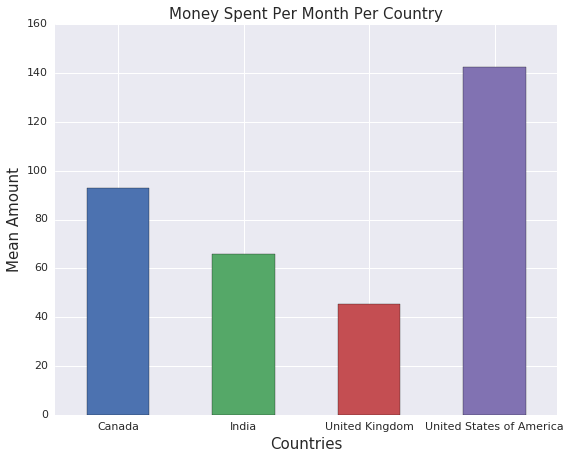

In [118]:
# Finding the mean amount spent monthly in different countries
money_learning_final = money_learning.groupby('CountryLive').mean()['MoneyPerMonth']
print(money_learning_final)

money_learning_final.plot.bar(figsize = (9,7),
                              rot=0, fontsize=11)
plt.title('Money Spent Per Month Per Country', 
          fontsize = 15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Mean Amount', fontsize = 15)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f9605c09908>,
 <a list of 4 Text xticklabel objects>)

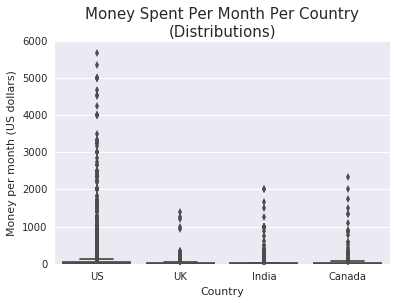

In [119]:
# Plotting box plot to visualize distributions

sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', 
            data = money_learning)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 15)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US','UK','India','Canada'])

### Best Markets To Advertise In

Among the two markets to choose, USA is definitely a clear choice. Advertising the product in a market where learners on average are paying \$143 can attract more customers as the subscription is much lower($59).



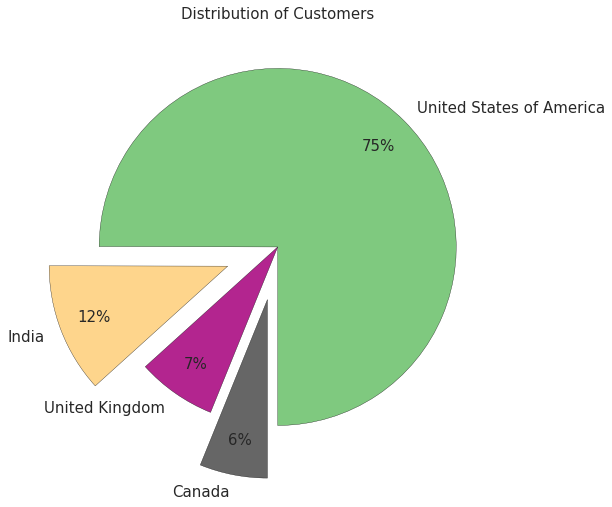

In [120]:
# Findinf the distribution of number of customers in different counrties
money_learning_count = money_learning['CountryLive'].value_counts(normalize = True)*100

money_learning_count.plot.pie(figsize = (8,8),autopct = '%1.0f%%',
                              pctdistance=0.8,colormap = 'Accent',
                              fontsize = 15, explode = (0.0, 0.3, 0.0, 0.3), startangle=270)
plt.title('Distribution of Customers', fontsize = 15)
plt.ylabel('')

To chose the second market, Canada and India are to be considered. 

Considering the average amount spent monthly-
- Canada seems to be a good market as the average monthly spending by the learners is higher in Canada when compared to India. 

Considering the number of learners/developers- 
- India has almost twice as more customers than we have in Canada. 

So, to choose between India and Canada, the choice is not very clear. Canada can be considered for marketting the product but the potential for growth can be higher in India as the number of learners are more.

The advertising costs can be split between these two countries along with US being a firm market to advertise. 

Or, any of the two countries can be chosen based on other regional factors. Advertising efforts can be put in for a couple of quarters. The sales numbers for that country can be evaluated again to analyze the growth and further decisions can be taken accordingly.  